# Examen Módulo 2 - Simulación Monte Carlo. <font color =blue> Tipo de examen 1.  </font>

Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:

- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería Examen1_LopezMichel.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

In [2]:
%matplotlib inline 

import math
import numpy as np
import pandas as pd

from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import dblquad

from collections import OrderedDict

# Primer punto (50 puntos)

## <font color = red> Problema 1 <font>

### Evaluación numérica de integrales por el método Monte Carlo

**1. (20 puntos)** 

Estimar la siguiente integral por el método Monte Carlo

$$I = \int_{0}^{1} \int_{0}^{1} e^{(x + y)^2}\ dx\ dy$$

---

### El método de integración numérica Monte Carlo

La integración _**Monte Carlo**_ es un método numérico para evaluar integrales definidas [[1](https://www.ime.usp.br/~jstern/miscellanea/LabSimulacao/EricVeach2.pdf), [2](http://www.math.chalmers.se/Stat/Grundutb/CTH/tms150/1112/MC.pdf), [3](http://physics.wm.edu/~evmik/classes/matlab_book/ch_integration/ch_integration.pdf)]. Sus principales ventajas son la simplicidad con la que puede ser implementado, así como su escalabilidad: mientras que los médotos clásicos para evaluar integrales definidas se vuelven más y más lentos conforme el número de dimensiones de la integral a estimar crece, la tasa de convergencia del método Monte Carlo depende no de la dimensión de la integral sino del número de muestras consideradas, lo que lo vuelve muy efectivo al evaluar integrales de alta dimensionalidad.

Monte Carlo se basa en la toma de muestras aleatorias uniformemente distribuidas dentro del región (área, volumen, etc.) de interés, evaluándolas para obtener una aproximacón ponderada al valor de la integral definida:

$$\int_{V_D} f(\overrightarrow{x})\ dV_D = \int_{V_D} f(\overrightarrow{x})\ dx_1\ dx_2 \ldots\ dx_D \approx \frac{V_D}{N} \sum_{i=1}^{N}\ f(\overrightarrow{x_i})$$

donde $V_D$ es el volumen $D$-dimensional, y $\overrightarrow{x_i}$ son puntos aleatoria y uniformemente distribuidos en el volumen $V_D$. El número de muestras consideradas $N$ juega un papel importante, pues entre mayor sea el número de muestras mayor será la exactitud de la aproximación.

Para en el caso de integrales de 2 dimensiones, tenemos que

$$\int_{a_y}^{b_y} \int_{a_x}^{b_x} f(x, y)\ dx\ dy \approx \frac{(b_x - a_x)(b_y - a_y)}{N} \sum_{i=1}^{N}\ f(x_i, y_i)$$

La implementación es la siguiente:

In [3]:
# ax, bx        Límites sup. e inf. de evaluación para dx.
# ay, by        Límites sup. e inf. de evaluación para dy.
# fn            Función cuya integral se busca estimar.
# num_muestras  Lista con diferentes números de muestras N.
# num_reps      Número de repeticiones (default: 100).
def monte_carlo_int_num(ax, bx, ay, by, fn, num_muestras, num_reps=100):
    '''
    Evalua integrales multidimensionales definidas empleando el método numérico
    de integración Monte Carlo, devolviendo una lista con diccionarios que asocian
    N, Min, Max, y Promedio con sus respectivos valores obtenidos.
    '''
    
    resultados = []  # Lista con los resultados (diccionarios).
    
    for N in num_muestras:
        estimaciones = []  # Lista con las estimaciones.
        
        for _ in range(num_reps):
            x = ax + (bx - ax) * np.random.rand(N)  # Arreglo con x_i's.
            y = ay + (by - ay) * np.random.rand(N)  # Arreglo con y_i's

            # Estima el valor de la función con x_i e y_i.
            estimaciones.append((bx - ax) * (by - ay) * sum(fn(x, y)) / N)

        # Anexa resultados a la lista de resultados.
        resultados.append(OrderedDict([
            ('N', N),
            ('Min', min(estimaciones)),
            ('Max', max(estimaciones)),
            ('Promedio', np.mean(estimaciones))
        ]))

    # Devuelve resultados.
    return resultados

**2. (20 puntos)** 

Realice una tabla con la librería Pandas para los resultados de la integración Monte Carlo para la ecuación anterior realizando $100$ realizaciones para cada uno de los valores $N$ que se muestran en la tabla siguiente. Muestre el valor estimado de la integral promedio y el resultado de máximo y mínimo de las $100$ realizaciones.

|N|min|promedio|max|
|---|---|---|---|
|10|*|*|*|
|100|*|*|*|
|1000|*|*|*|
|10000|*|*|*|

In [4]:
fn = lambda x, y: np.exp((x + y) ** 2)  # Función f(x, y) a integrar.
num_muestras = 10 ** np.array([1, 2, 3, 4])  # Valores de N (10, 100, 1000, 10000).

# Obten los resultados de la evaluación para cada N.
resultados = monte_carlo_int_num(0, 1, 0, 1, fn, num_muestras)

# Convierte los datos obtenidos a tabla de Pandas.
df = pd.DataFrame(resultados)

# Imprime la tabla.
df.head()

N       Min        Max  Promedio
0     10  2.255777  13.265720  5.076367
1    100  3.305376   6.594138  4.871240
2   1000  4.311334   5.303395  4.875365
3  10000  4.733155   5.026860  4.892369

La tabla obtenida nos confirma lo establecido anteriormente: entre más muestras consideremos, la aproximación se vuelve más exacta. Esto lo podemos corroborar obteniendo el valor verdadero de la integral definida y comparándolo con el valor más exacto obtenido por el método Monte Carlo:

In [5]:
resultado_monte_carlo = resultados[-1]['Promedio']  # Promedio para N = 10,000 muestras.
resultado_real = dblquad(fn, 0, 1, lambda x: 0, lambda x: 1)[0]

error_absoluto = abs(resultado_monte_carlo - resultado_real)
error_relativo = error_absoluto * 100 / resultado_real

print('El error relativo es: {:.4f}%.'.format(error_relativo))

El error relativo es: 0.1386%.


Como podemos ver, para $N = 10000$ muestras, el error en la aproximación por el método Monte Carlo está por debajo del 1%.

**3. (10 puntos)** 

Grafique la funcion a integrar.

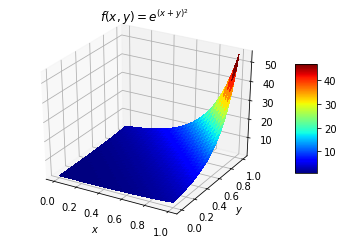

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(0, 1, 30)  # Usa 30 x's en [0, 1] espaciadas uniformemente.
y = np.linspace(0, 1, 30)  # Usa 30 y's en [0, 1] espaciadas uniformemente.
X, Y = np.meshgrid(x, y)

# Evalua la función usando los puntos seleccionados.
Z = fn(X, Y)

# Grafica la función en forma de superficie, con escala de colores.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=False)

# Coloca título encima de la gráfica y leyendas en los ejes.
plt.title('$f(x, y) = e^{(x + y)^{2}}$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Coloca junto a la gráfica una barra que asocia colores con valores.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Dibuja la gráfica.
plt.show()

# Segundo punto (50 puntos)

## Ley del enfriamiento de Newton

La ley empírica de Newton, relativa al enfriamiento de un objeto, se expresa con la ecuación diferencial lineal de primer orden

$$\frac{dT}{dt} = k(T - T_m) $$

en que $k$ es una constante de proporcionalidad, $T(t)$ es la temperatura del objeto cuando $t > 0$ y $T_m$ es la temperatura ambiente; o sea, la temperatura del medio que rodea al objeto. Supondremos que $T_m$ es constante.

## <font color = red> Problema 2 <font>

### ¿Cuánto esperar para tomar el café?

Primero calentamos agua a $80°\ C$. Posteriormente agregamos café al vaso con el agua caliente. Después realizamos la medición de la temperatura ambiente, la cual fue de $24°\ C$. Realiza las siguientes actividades:

**1. (5 puntos)**

- Simule el sistema en un tiempo de $0$ a $120$ unidades de tiempo  con una constante de proporcionalidad $k = -0.0565$.
- Grafique la solución.

---

La _**ley de enfriamiento de Newton**_ establece que la rapidez de enfriamiento de un objeto es proporcional a la diferencia de temperatura entre el objeto y su ambiente, siempre que esta diferencia no sea muy grande. Por medio de una simple sustitución de variables, podemos reducir la ley de Newton a una instancia de la _**ley de decaimiento natural**_ (cuando $k < 0$) y así encontrar una solución cerrada a la ecuación diferencial. Tomando $y = T - T_m$, $y(0) = T(0) - T_m$. Sustituyendo $T$ por $y$ obtenemos

$$\frac{dy}{dt} = k y$$

cuya solución, por la ley de decaimiento natural, es

$$y = y(0)\ e^{kt}$$

sustituyendo de vuelta $y$ por $T$ y despejando para $T$, obtenemos

$$T = T_m + (T(0) - T_m)\ e^{kt}$$

La implementación es:

In [7]:
# t           Intervalo de tiempo a evaluar.
# T_0         Temperatura inicial.
# T_m         Temperatura ambiente.
# const_prop  Constante de proporcionalidad (fija).
def enfriamiento_newton(t, T_0, T_m, const_prop):
    """
    Modela el enfriamiento de un objeto empleando la ley empírica de Newton.
    """
    
    T = T_m + (T_0 - T_m) * np.exp(const_prop * t)
    
    return T

In [8]:
def muestra_graficas():
    # Coloca título encima de la gráfica y leyendas en los ejes.
    plt.title('Enfriamiento del café')
    plt.xlabel('Unidades de tiempo')
    plt.ylabel('Temperatura')

    # Dibuja cuadricula y ajusta rango de los ejes.
    axes = plt.gca()
    axes.set_xlim([0, t_f])
    axes.set_ylim([0, 100])
    plt.grid(True, lw=0.5, ls='--', c='0.75')

    # Dibuja la gráfica.
    plt.legend()
    plt.show()

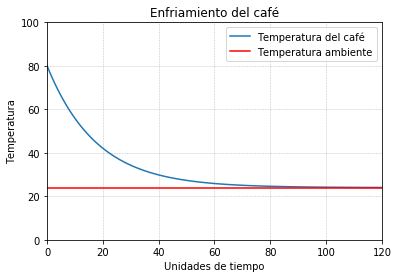

In [9]:
T_0, T_m = 80, 24  # Temperaturas inicial y ambiente.
k = -0.0565  # Constante de proporcionalidad.

t_0, t_f = 0, 120  # Intervalo de tiempo en el que el sistema será simulado.
t = np.linspace(t_0, t_f, t_f - t_0 + 1)

# Simula el sistema en el intervalo de tiempo seleccionado.
T = enfriamiento_newton(t, T_0, T_m, k)

# Grafica el comportamiento del sistema.
plt.plot(t, T, label='Temperatura del café')

# Grafica la temperatura ambiente como referencia.
plt.plot(t, T_m * np.ones(t_f - t_0 + 1), label='Temperatura ambiente', color='red')

# Dibuja las graficas.
muestra_graficas()

**2. (20 puntos)**

- Supoga que cada unidad de tiempo corresponde a un minuto. ¿Qué temperatura tiene en el minuto $40$?
- Ahora simula tu sistema utilizando una variable aleatoria para la temperatura inicial $T_0$ con una distribución normal de media $80$ y una desviación estándar de $5$. Realiza $100$ realizaciones.
- Grafica las $100$ realizaciones.

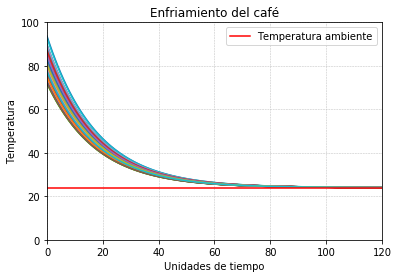

In [10]:
num_reps = 100  # 100 realizaciones.
temps = []  # Lista de lecturas de temperatura.

for _ in range(num_reps):
    # Utiliza una variable aleatoria normalmente distribuida,
    # media: 80, desv. est: 5, como temperatura inicial.
    T_0 = np.random.normal(80.0, 5.0)

    # Simula el sistema en el intervalo de tiempo seleccionado.
    T = enfriamiento_newton(t, T_0, T_m, k)
    
    # Para t_0 = 0 y t_f = 120, en total tenemos 121 puntos que corresponden a las unidades
    # de tiempo [0, 1, ..., 120]. Así, podemos acceder a la temperatura del café por minuto.
    
    # Almacena las temperaturas en el minuto 40 para obtener su promedio en el siguiente punto.
    temps.append(T[40])

    # Grafica el comportamiento del sistema.
    plt.plot(t, T)

# Grafica la temperatura ambiente como referencia.
plt.plot(t, T_m * np.ones(t_f - t_0 + 1), label='Temperatura ambiente', color='red')

# Dibuja las graficas.
muestra_graficas()

**3. (25 puntos)**

- De las $100$ realizaciones, ¿cuál es la temperatura promedio en el minuto $40$?
- ¿Cuál es la desviación estándar de los valores anteriores?

In [11]:
# La lista 'temps' contiene 100 lecturas de temperatura en el minuto 40.

print('La temperatura promedio en el minuto 40 es: {:.4f}º C.'.format(np.mean(temps)))
print('La desviación estandar es: {:.4f}º C.'.format(np.std(temps)))

La temperatura promedio en el minuto 40 es: 29.9138º C.
La desviación estandar es: 0.4909º C.


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Michel Emanuel López Franco.
</footer>